Часть первая

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random
from sklearn.datasets import load_diabetes

In [2]:
# Генерирование случайных размеров ног и роста
data = []
for i in range(15):
    base = random.gauss(100, 5)
    leg = base / 3.8 + random.gauss(0, 1)
    height = base * 1.7 + random.gauss(0, 2)
    data.append([leg, height])

data = np.array(data)

In [3]:
def proceed(x,k,c):
    return x * k+ c


def perceptron(input_data, rate, num_step, mod:bool=False):
    targets = data[:,1]
    k = random.uniform(-5, 5)
    c = random.uniform(-5, 5)
    error_history=[]
    for i in range(num_step):
        x = random.choice(input_data)
        true_result = targets[np.where((input_data == x).all(axis=1))[0][0]]
        out = proceed(x,k,c)
        delta = true_result - out
        k += delta * rate * x[0]
        c += delta * rate * x[1]
        if i % 100 == 0:
            error = np.mean((targets - proceed(input_data[:,0],k[0],c[0])) ** 2)
            error_history.append(error)
            if mod:
                rate*=0.99
   
    return k, c, error_history

In [4]:
# Разделите входные характеристики (размер ноги) и целевую переменную (рост)
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

# Алгоритм на основе перцептрона
k_perceptron, c_perceptron, _ = perceptron(data, 0.001, 100000)
y_pred_perceptron = k_perceptron[0] * X.flatten() + c_perceptron[0]
mse_perceptron = mean_squared_error(y, y_pred_perceptron)

# LinearRegression из scikit-learn
regressor = LinearRegression()
regressor.fit(X, y)
y_pred_regression = regressor.predict(X)
mse_regression = mean_squared_error(y, y_pred_regression)

C:\Users\uumk0\AppData\Local\Temp\ipykernel_9948\265977706.py:2: RuntimeWarning: overflow encountered in multiply
  return x * k+ c
C:\Users\uumk0\AppData\Local\Temp\ipykernel_9948\265977706.py:15: RuntimeWarning: invalid value encountered in add
  k += delta * rate * x[0]
C:\Users\uumk0\AppData\Local\Temp\ipykernel_9948\265977706.py:16: RuntimeWarning: invalid value encountered in add
  c += delta * rate * x[1]


In [5]:
# Выводим MSE для каждого подхода
print("MSE - Перцептрон: ", mse_perceptron)
print("MSE - Линейная регрессия: ", mse_regression)

MSE - Перцептрон:  66.62979763788766
MSE - Линейная регрессия:  12.18329304479931


In [6]:
# Загрузите набор данных о диабете
diabetes = load_diabetes()
X = diabetes.data[:15]
y = diabetes.target[:15]

# Выбор одного входного параметра
X_one_param = X[:, 2].reshape(-1, 1)

# Алгоритм на основе перцептрона
k_perceptron, c_perceptron, _ = perceptron(np.hstack((X_one_param, y.reshape(-1, 1))), 0.001, 100000)
y_pred_perceptron = k_perceptron[0] * X_one_param.flatten() + c_perceptron[0]
mse_perceptron = mean_squared_error(y, y_pred_perceptron)

In [7]:
# LinearRegression из scikit-learn с одним входным параметром
regressor_one_param = LinearRegression()
regressor_one_param.fit(X_one_param, y)
y_pred_regression_one_param = regressor_one_param.predict(X_one_param)
mse_regression_one_param = mean_squared_error(y, y_pred_regression_one_param)

# Линейная регрессия из scikit-learn с десятью входными параметрами
regressor_ten_param = LinearRegression()
regressor_ten_param.fit(X, y)
y_pred_regression_ten_param = regressor_ten_param.predict(X)
mse_regression_ten_param = mean_squared_error(y, y_pred_regression_ten_param)

In [8]:
# Выводим MSE для каждого подхода
print("MSE - Perceptron (one input parameter): ", mse_perceptron)
print("MSE - Linear Regression (one input parameter): ", mse_regression_one_param)
print("MSE - Linear Regression (ten input parameters): ", mse_regression_ten_param)


MSE - Perceptron (one input parameter):  5045.726755217136
MSE - Linear Regression (one input parameter):  3467.6383323745354
MSE - Linear Regression (ten input parameters):  288.94421527311647


часть вторая

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.metrics import roc_auc_score

In [10]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=None, alpha=0.1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.alpha = alpha
        self.w_ = None
        self.train_errors_ = []
        self.test_errors_ = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.sigmoid(self.net_input(X)) >= 0.5, 1, -1)

    def fit(self, X, y):
        if self.random_state:
            np.random.seed(self.random_state)

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        self.train_errors_ = []
        self.test_errors_ = []

        for _ in range(self.n_iter):
            train_errors = 0

            for xi, yi in zip(X, y):
                output = self.predict(xi)
                error = yi - output
                update = self.eta * error * self.sigmoid(self.net_input(xi)) * (1 - self.sigmoid(self.net_input(xi)))
                self.w_[1:] += update * xi - self.alpha * self.w_[1:]
                self.w_[0] += update
                train_errors += int(error != 0.0)

            test_errors = 0
            for xi, yi in zip(X_test, y_test):
                prediction = self.predict(xi)
                test_errors += int(prediction != yi)

            self.train_errors_.append(train_errors)
            self.test_errors_.append(test_errors)

        return self

In [11]:
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

X = X[:100]
y = y[:100]
y[y == 0] = -1

In [12]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Создание экземпляра классификатора Perceptron
ppn2 = Perceptron(eta=0.1, n_iter=1000)
ppn2.fit(X_train, y_train)

# Создание экземпляра классификатора LinearSVC
svc2 = LinearSVC(random_state=1)
svc2.fit(X_train, y_train)

LinearSVC(random_state=1)

In [13]:
# Вычисление ошибок классификации для первых 2 параметров
sample_size = 20
random_state = 1

# Перцептронный классификатор
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_test, y_test, test_size=sample_size, random_state=random_state
)

ppn2_errors = sum(ppn2.predict(X_test_sample) != y_test_sample)

# Классификатор LinearSVC
svc2_errors = sum(svc2.predict(X_test_sample) != y_test_sample)

In [14]:
# Выведите ошибки классификации для первых 2 параметров
print("Classification errors for the first 2 parameters:")
print("Perceptron:", ppn2_errors / sample_size * 100, "%")
print("LinearSVC:", svc2_errors / sample_size * 100, "%")

Classification errors for the first 2 parameters:
Perceptron: 10.0 %
LinearSVC: 0.0 %


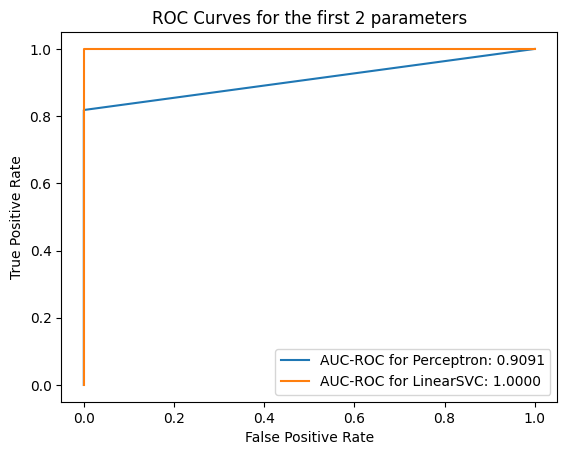

In [15]:
# Вычисление FPR и TPR для первых 2 параметров
ppn2_y_probs = ppn2.predict(X_test_sample)
fpr_ppn2, tpr_ppn2, _ = roc_curve(y_test_sample, ppn2_y_probs)

svc2_y_probs = svc2.decision_function(X_test_sample)
fpr_svc2, tpr_svc2, _ = roc_curve(y_test_sample, svc2_y_probs)

ppn2_auc = roc_auc_score(y_test_sample, ppn2_y_probs)
svc2_auc = roc_auc_score(y_test_sample, svc2_y_probs)

# Визуализация кривых ROC на одном экране
fig, ax = plt.subplots()

roc_display_ppn2 = RocCurveDisplay(fpr=fpr_ppn2, tpr=tpr_ppn2, estimator_name='Perceptron')
roc_display_ppn2.plot(ax=ax)

roc_display_svc2 = RocCurveDisplay(fpr=fpr_svc2, tpr=tpr_svc2, estimator_name='LinearSVC')
roc_display_svc2.plot(ax=ax)

plt.title('ROC Curves for the first 2 parameters')

plt.legend(["AUC-ROC for Perceptron: {:.4f}".format(ppn2_auc),
            "AUC-ROC for LinearSVC: {:.4f}".format(svc2_auc)])

plt.show()


In [16]:
# Повторите процесс для первых 4 параметров
X = iris.data[:, [0, 1, 2, 3]]
y = iris.target

X = X[:100]
y = y[:100]
y[y == 0] = -1

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

ppn4 = Perceptron(eta=0.1, n_iter=1000)
ppn4.fit(X_train, y_train)

svc4 = LinearSVC(random_state=1)
svc4.fit(X_train, y_train)

LinearSVC(random_state=1)

In [18]:
# Вычисление ошибок классификации для первых 4 параметров
# Перцептронный классификатор
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_test, y_test, test_size=sample_size, random_state=random_state
)
ppn4_errors = sum(ppn4.predict(X_test_sample) != y_test_sample)

# Классификатор LinearSVC
svc4_errors = sum(svc4.predict(X_test_sample) != y_test_sample)

In [19]:
# Выведите ошибки классификации для первых 4 параметров
print("Classification errors for the first 4 parameters:")
print("Perceptron:", ppn4_errors / sample_size * 100, "%")
print("LinearSVC:", svc4_errors / sample_size * 100, "%")

Classification errors for the first 4 parameters:
Perceptron: 5.0 %
LinearSVC: 0.0 %


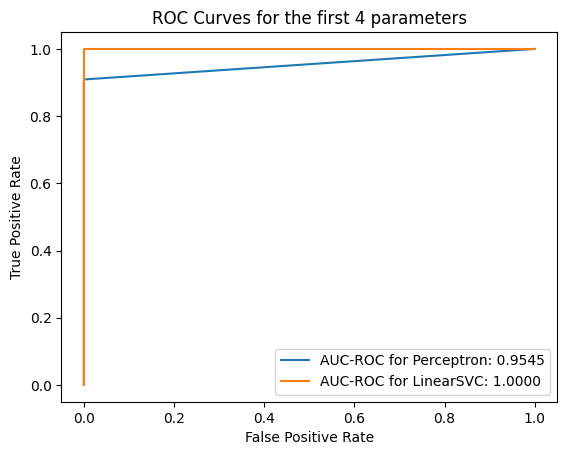

In [20]:
# Вычисление FPR и TPR для первых 4 параметров
ppn4_y_pred = ppn4.predict(X_test_sample)
fpr_ppn4, tpr_ppn4, _ = roc_curve(y_test_sample, ppn4_y_pred)

svc4_y_probs = svc4.decision_function(X_test_sample)
fpr_svc4, tpr_svc4, _ = roc_curve(y_test_sample, svc4_y_probs)

ppn4_auc = roc_auc_score(y_test_sample, ppn4_y_pred)
svc4_auc = roc_auc_score(y_test_sample, svc4_y_probs)

# Визуализация кривых ROC на одном экране
fig, ax = plt.subplots()

roc_display_ppn4 = RocCurveDisplay(fpr=fpr_ppn4, tpr=tpr_ppn4, estimator_name='Perceptron')
roc_display_ppn4.plot(ax=ax)

roc_display_svc4 = RocCurveDisplay(fpr=fpr_svc4, tpr=tpr_svc4, estimator_name='LinearSVC')
roc_display_svc4.plot(ax=ax)

plt.title('ROC Curves for the first 4 parameters')

plt.legend(["AUC-ROC for Perceptron: {:.4f}".format(ppn4_auc),
            "AUC-ROC for LinearSVC: {:.4f}".format(svc4_auc)])

plt.show()